In [1]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load RGB Data

In [3]:
rgb_data = pd.read_csv('./colorChart/colorChart_11.csv')
rgb_data

,index,name,R,G,B
0,0,aqua,0,255,255
1,1,black,0,0,0
2,2,blue,0,0,255
3,3,fuchsia,255,0,255
4,4,green,0,128,0
5,5,lime,0,255,0
6,6,maroon,128,0,0
7,7,navy,0,0,128
8,8,red,255,0,0
9,9,white,255,255,255


In [4]:
rgbs = rgb_data[['R', 'G', 'B']]
rgbs

,R,G,B
0,0,255,255
1,0,0,0
2,0,0,255
3,255,0,255
4,0,128,0
5,0,255,0
6,128,0,0
7,0,0,128
8,255,0,0
9,255,255,255


In [5]:
rgb_name = rgb_data['name'].to_list()
rgb_name

['aqua',
 'black',
 'blue',
 'fuchsia',
 'green',
 'lime',
 'maroon',
 'navy',
 'red',
 'white',
 'yellow']

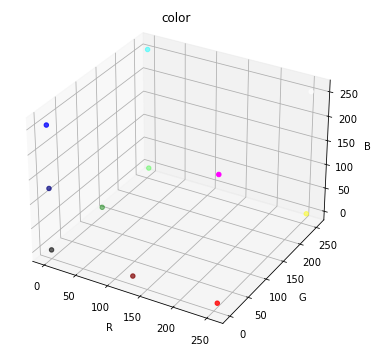

In [6]:
# 이미지 픽셀값 분포 scatter
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(rgbs['R'], rgbs['G'], rgbs['B'], c = rgb_name);
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('color', y=1.02)

plt.tight_layout()
plt.savefig(f'color.png')
plt.show()

In [7]:
rgbs = rgb_data[['R', 'G', 'B']].values.tolist()
rgbs

[[0, 255, 255],
 [0, 0, 0],
 [0, 0, 255],
 [255, 0, 255],
 [0, 128, 0],
 [0, 255, 0],
 [128, 0, 0],
 [0, 0, 128],
 [255, 0, 0],
 [255, 255, 255],
 [255, 255, 0]]

# Data Augmentation

In [8]:
n = 1000 # how many points to augment per data

In [9]:
def color_range(point):
    if point == 255:
        return (171, 255)
    elif point == 0:
        return (0, 85)
    else:
        return (86, 170)

In [10]:
def augment_color(n):
    aug = [] # augmented rgb point
    aug_idx = [] # color label
    
    for c in range(len(rgbs)):
        r, g, b = tuple(rgbs[c])
        
        # calculate RGB range
        r_1, r_2 = color_range(r)
#         r_1, r_2 = color_limit(r_1), color_limit(r_2)
        g_1, g_2 = color_range(g)
#         g_1, g_2 = color_limit(g_1), color_limit(g_2)
        b_1, b_2 = color_range(b)
#         b_1, b_2 = color_limit(b_1), color_limit(b_2)
        
        # append randomly created data point
        num = 0
        while num != n: # repeat n-times
            new_point = [random.randint(r_1, r_2), random.randint(g_1, g_2), random.randint(b_1, b_2)]
            if new_point != rgbs[c] and new_point not in aug: # if the new point already exists, do not append
                aug.append(new_point)
                aug_idx.append(c)
                num += 1
            
    return aug, aug_idx

In [11]:
augmented, aug_idx = augment_color(n)

In [12]:
aug = pd.DataFrame(augmented)
aug.head()

,0,1,2
0,19,223,251
1,5,251,174
2,4,189,210
3,12,195,222
4,42,226,230


In [13]:
aug.columns = ['R', 'G', 'B']
aug.head()

,R,G,B
0,19,223,251
1,5,251,174
2,4,189,210
3,12,195,222
4,42,226,230


In [14]:
aug = pd.concat([aug, rgb_data[['R', 'G', 'B']]], ignore_index=True)
aug.head()

,R,G,B
0,19,223,251
1,5,251,174
2,4,189,210
3,12,195,222
4,42,226,230


In [15]:
aug_idx = pd.DataFrame(aug_idx)
aug_idx.columns = ['index']
aug_idx.head()

,index
0,0
1,0
2,0
3,0
4,0


In [16]:
aug_idx = pd.concat([aug_idx, rgb_data[['index']]], ignore_index=True)
aug_idx.head()

,index
0,0
1,0
2,0
3,0
4,0


In [17]:
augmented_color = aug.join(aug_idx)
augmented_color.head()

,R,G,B,index
0,19,223,251,0
1,5,251,174,0
2,4,189,210,0
3,12,195,222,0
4,42,226,230,0


In [18]:
len(augmented_color)

11011

In [19]:
data_idx = augmented_color['index'].to_list()

In [20]:
colors = []
for i in range(len(data_idx)):
    colors.append(rgb_name[data_idx[i]])
    
len(colors)

11011

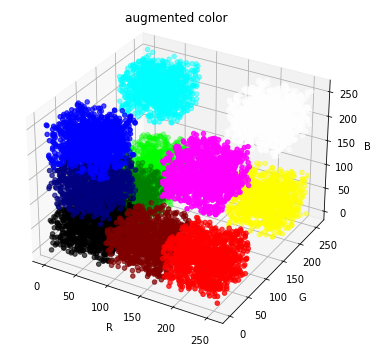

In [21]:
# 이미지 픽셀값 분포 scatter
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(aug['R'], aug['G'], aug['B'], c = colors);
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('augmented color', y=1.02)

plt.tight_layout()
plt.savefig(f'color_augmented.png')
plt.show()

In [22]:
augmented_color.to_csv('./colorChart/augmented_color_chart_11.csv', index=False)